# Geopandas Playground
Playing around in Geopandas to test its suitability for the research project

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

%matplotlib inline

Attempting to read the geodatabase from [CALFIRE](https://www.fire.ca.gov/what-we-do/fire-resource-assessment-program/fire-perimeters)

In [3]:
calfires = gpd.read_file("fire22_1.gdb")

In [4]:
# seeing what it looks like
calfires.head()

,YEAR_,STATE,AGENCY,UNIT_ID,TREATMENT_ID,TREATMENT_NAME,START_DATE,END_DATE,TREATED_AC,GIS_ACRES,RX_CONSUM,PRE_CON_CLASS,POST_CON_CLASS,TREATMENT_TYPE,Shape_Length,Shape_Area,geometry
0,2020,CA,CDF,AEU,10509,Jan 31 2020 Broadcast,2020-01-31 00:00:00+00:00,2020-01-31T00:00:00+00:00,15.0,15.047042,NaN,NaN,NaN,1.0,1365.887529,60893.216906,"MULTIPOLYGON (((-45261.902 81865.442, -45248.3..."
1,2020,CA,PVT,AEU,10572,2020 Fuels Reduction,2020-02-13 00:00:00+00:00,2020-02-13T00:00:00+00:00,22.3,36.739700,NaN,NaN,NaN,1.0,2681.610336,148680.293398,"MULTIPOLYGON (((-57222.192 98500.043, -57231.6..."
2,2020,CA,CDF,AEU,10630,Feb 2020 Broadcast,2020-02-13 00:00:00+00:00,2020-02-18T00:00:00+00:00,22.4,38.839832,NaN,NaN,NaN,1.0,3918.219956,157179.228865,"MULTIPOLYGON (((-49821.237 54143.575, -49815.4..."
3,2020,CA,CDF,AEU,10639,Feb 2020 Broadcast,2020-02-11 00:00:00+00:00,2020-02-20T00:00:00+00:00,75.5,75.498100,NaN,NaN,NaN,1.0,3918.834462,305529.980211,"MULTIPOLYGON (((-47052.539 80922.773, -47052.5..."
4,2020,CA,CDF,AEU,10780,Mar 3 2020 Broadcast,2020-03-03 00:00:00+00:00,2020-03-03T00:00:00+00:00,61.8,61.771519,NaN,NaN,NaN,1.0,2769.034316,249980.461716,"MULTIPOLYGON (((-47591.189 80696.956, -47590.2..."


In [5]:
print(calfires[["YEAR_"]])

     YEAR_
0     2020
1     2020
2     2020
3     2020
4     2020
...    ...
8630  2022
8631  2022
8632  2022
8633  2022
8634  2022

[8635 rows x 1 columns]


<AxesSubplot:>

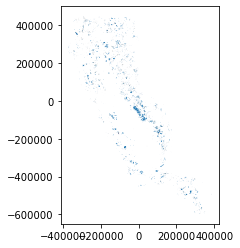

In [6]:
calfires.plot()

Trying to find the lowest year because for some reason all of the years are STRINGS????

In [7]:
lowest_year = 2023
for i in calfires.YEAR_:
    try:
        if int(i) < lowest_year:
            lowest_year = int(i)
    except:
        print("no year, just ")
        print(i)

print(lowest_year)

no year, just 

no year, just 

no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
no year, just 
 
1900


Finding how many fires are from each year

In [8]:
no_year = open("no_years.txt", "w")
write_to = ""
year_count = {}
year_dist = open("year_dist.csv", "w")

for i in calfires.index:
    year = 0
    try:
        year = int(calfires["YEAR_"][i])
    except:
        write_to += str(i)
        write_to += "\n"

    if year not in year_count.keys():
        year_count[year] = 1
    else:
        year_count[year] += 1

no_year.write(write_to)
print(year_count)

year_dist_str = ""
for i in year_count.keys():
    year_dist_str += str(i)
    year_dist_str += ", "
    year_dist_str += str(year_count[i])
    year_dist_str += "\n"

year_dist.write(year_dist_str)

{2020: 706, 2017: 242, 2015: 152, 2014: 129, 1998: 78, 1997: 77, 1993: 65, 1999: 66, 1996: 58, 2006: 405, 1995: 81, 2004: 186, 2005: 370, 2002: 65, 1991: 58, 1994: 64, 2000: 40, 1989: 67, 1983: 106, 1968: 6, 1979: 64, 1977: 38, 1974: 7, 1975: 12, 1981: 105, 1980: 52, 1976: 13, 2001: 75, 2010: 234, 2013: 173, 2009: 224, 2011: 257, 2007: 210, 2008: 242, 2012: 134, 1984: 71, 1985: 58, 1960: 25, 1966: 6, 1961: 3, 1962: 7, 1954: 29, 1955: 17, 1928: 1, 1933: 1, 1946: 2, 1947: 2, 1950: 7, 1951: 19, 2003: 92, 1986: 50, 1965: 8, 1967: 6, 1969: 4, 1970: 10, 1971: 11, 1972: 10, 1973: 1, 1978: 10, 1963: 4, 1964: 9, 1990: 84, 1987: 46, 1982: 98, 1992: 37, 1956: 20, 1957: 18, 1952: 18, 1988: 53, 1959: 4, 1900: 4, 1910: 1, 1911: 1, 1912: 1, 1913: 1, 1914: 1, 1915: 12, 1916: 3, 1917: 2, 1919: 2, 0: 21, 1922: 1, 1923: 1, 1924: 4, 1958: 22, 1953: 26, 2016: 53, 2018: 446, 2019: 1034, 2021: 692, 2022: 605}


808

Attempting to use sklearn's Support Vector Machine algorithm on the geodataframe

In [9]:
X = calfires[["YEAR_", "ALARM_DATE", "CAUSE", "REPORT_AC"]]
y = calfires[["geometry"]]

train_X, test_X = train_test_split(X, test_size=.1, random_state=1)
train_y, test_y = train_test_split(y, test_size=.1, random_state=1)

test_svr = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
test_svr.fit(X, y)

KeyError: "['ALARM_DATE', 'CAUSE', 'REPORT_AC'] not in index"

## IT'S TIME TO GET SHAPELY

In [22]:
shape = calfires.iloc[1]["geometry"]
print(shape)
print(type(shape))
print(shape.convex_hull)
print(shape.convex_hull.boundary.coords)
for i in shape.convex_hull.boundary.coords:
    print(i[0])
    print(i[1])

MULTIPOLYGON (((-57222.1922999993 98500.04329999909, -57231.62510000169 98506.23469999991, -57240.441300000995 98511.49469999969, -57246.09530000016 98509.89440000057, -57255.729499999434 98498.86549999937, -57260.95419999957 98494.28089999966, -57264.5458999984 98493.68170000054, -57265.971200000495 98496.54250000045, -57264.24469999969 98504.60789999925, -57261.2584999986 98519.37260000035, -57265.45969999954 98536.57239999995, -57284.275800000876 98557.5167999994, -57296.39860000089 98569.73159999959, -57298.811599999666 98573.63350000046, -57320.37739999965 98581.4048999995, -57333.664599999785 98585.96959999949, -57338.42720000073 98586.19849999994, -57355.02470000088 98579.51319999993, -57370.53119999915 98578.27999999933, -57376.664799999446 98577.67989999987, -57389.18910000101 98573.98489999957, -57399.31579999998 98573.56189999916, -57401.19610000029 98573.66819999926, -57420.78579999879 98572.16540000029, -57428.63190000132 98567.62719999999, -57431.82470000163 98566.9601000